In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from address_extractor import get_detailed_address
from googletrans import Translator, constants
import re

In [113]:
df = pd.read_csv("mohammedadnan_estatemartbd.csv")
df

,Name,Location,Bathrooms,Bedrooms,Size (in sqft),Price per sqft,Ownership type,Description,Posting,Features,property_type,Total price,AD URL
0,The Valley Bangladesh ...,Dhaka,NaN,NaN,"3, 4, 5 kasha land SqFt",1400000/katha,Owner,The Valley is a small gated community land pro...,Sale,NaN,None,"4,200,000.00",https://www.estatemartbd.com/property/234/en/t...
1,1250 Sqft Flat for Sale along with the Land Sh...,Banasree Dhaka,3,3,1250 SqFt,NaN,Agent,জমি: ৬৭ কাঠা/ (৭৩ কাঠা)\nটাওয়ার: ৬টি\nফ্লাট: ৪...,Sale,NaN,Residential,"1,660,000.00",https://www.estatemartbd.com/property/231/en/1...
2,"1518 sqft, 3 Beds large Apartment is ready for...",Dhaka,3,3,1518 SqFt,"11,000",Agent,When it comes to securing a permanent address ...,Sale,"Balcony ,Lift ,Grill ,Pool ,Parking",Residential,"16,698,000.00",https://www.estatemartbd.com/property/233/en/1...
3,Sina Sweet Pea ...,Dhaka,2,3,950 SqFt,NaN,Owner,NaN,Sale,"Cable TV ,Balcony ,Parking",None,"29,500,000.00",https://www.estatemartbd.com/property/240/en/s...
4,"Ready Flat For Sale In Shyamoli, Shakhertek Ma...",Dhaka,03,03,1400 SqFt,6000,Agent,This apartment is spacious. The kitchen is bea...,Sale,"Air conditioning ,Cable TV ,Computer ,Dishwash...",Residential,"8,700,000.00",https://www.estatemartbd.com/property/232/en/r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Orchard Shadows 2165 Sqft at Bashundhara R/A ...,Bashundhara R/A,4,4,2165 SqFt,9500,Builder,Project Name: Orchard ShadowsAddress: Plot 289...,Sale,"Air conditioning ,Cable TV ,Computer ,Dishwash...",Residential,"21,567,500.00",https://www.estatemartbd.com/property/194/en/o...
149,Ready Flat for Sale at Keraniganj with Loan Fa...,Dhaka,3,3,1200 SqFt,2600(Fixed),Owner,Want to sale ready flat at Keraniganj in Dhaka...,Sale,NaN,Residential,"3,120,000.00",https://www.estatemartbd.com/property/199/en/r...
150,Find 1900-2400 sqft Hatirjheel lakeside view L...,"Badda, Dhaka",4,3,1900 SqFt,NaN,Builder,A well-designed and well-constructed building ...,Sale,NaN,Residential,"20,300,000.00",https://www.estatemartbd.com/property/203/en/f...
151,Vivek Maliat 1200 Sqft Luxurious Flat for Sale...,"Uttara, Dhaka",3,3,1200 SqFt,7000,Builder,"Address: Road-20/A, Plot-1140, Sector-3, Uttar...",Sale,"Balcony ,Lift ,Grill ,Parking",Residential,"9,100,000.00",https://www.estatemartbd.com/property/204/en/v...


In [114]:
df_fin = df.copy()
df_fin

,Name,Location,Bathrooms,Bedrooms,Size (in sqft),Price per sqft,Ownership type,Description,Posting,Features,property_type,Total price,AD URL
0,The Valley Bangladesh ...,Dhaka,NaN,NaN,"3, 4, 5 kasha land SqFt",1400000/katha,Owner,The Valley is a small gated community land pro...,Sale,NaN,None,"4,200,000.00",https://www.estatemartbd.com/property/234/en/t...
1,1250 Sqft Flat for Sale along with the Land Sh...,Banasree Dhaka,3,3,1250 SqFt,NaN,Agent,জমি: ৬৭ কাঠা/ (৭৩ কাঠা)\nটাওয়ার: ৬টি\nফ্লাট: ৪...,Sale,NaN,Residential,"1,660,000.00",https://www.estatemartbd.com/property/231/en/1...
2,"1518 sqft, 3 Beds large Apartment is ready for...",Dhaka,3,3,1518 SqFt,"11,000",Agent,When it comes to securing a permanent address ...,Sale,"Balcony ,Lift ,Grill ,Pool ,Parking",Residential,"16,698,000.00",https://www.estatemartbd.com/property/233/en/1...
3,Sina Sweet Pea ...,Dhaka,2,3,950 SqFt,NaN,Owner,NaN,Sale,"Cable TV ,Balcony ,Parking",None,"29,500,000.00",https://www.estatemartbd.com/property/240/en/s...
4,"Ready Flat For Sale In Shyamoli, Shakhertek Ma...",Dhaka,03,03,1400 SqFt,6000,Agent,This apartment is spacious. The kitchen is bea...,Sale,"Air conditioning ,Cable TV ,Computer ,Dishwash...",Residential,"8,700,000.00",https://www.estatemartbd.com/property/232/en/r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Orchard Shadows 2165 Sqft at Bashundhara R/A ...,Bashundhara R/A,4,4,2165 SqFt,9500,Builder,Project Name: Orchard ShadowsAddress: Plot 289...,Sale,"Air conditioning ,Cable TV ,Computer ,Dishwash...",Residential,"21,567,500.00",https://www.estatemartbd.com/property/194/en/o...
149,Ready Flat for Sale at Keraniganj with Loan Fa...,Dhaka,3,3,1200 SqFt,2600(Fixed),Owner,Want to sale ready flat at Keraniganj in Dhaka...,Sale,NaN,Residential,"3,120,000.00",https://www.estatemartbd.com/property/199/en/r...
150,Find 1900-2400 sqft Hatirjheel lakeside view L...,"Badda, Dhaka",4,3,1900 SqFt,NaN,Builder,A well-designed and well-constructed building ...,Sale,NaN,Residential,"20,300,000.00",https://www.estatemartbd.com/property/203/en/f...
151,Vivek Maliat 1200 Sqft Luxurious Flat for Sale...,"Uttara, Dhaka",3,3,1200 SqFt,7000,Builder,"Address: Road-20/A, Plot-1140, Sector-3, Uttar...",Sale,"Balcony ,Lift ,Grill ,Parking",Residential,"9,100,000.00",https://www.estatemartbd.com/property/204/en/v...


In [115]:
df_fin = df.copy()

In [116]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            153 non-null    object
 1   Location        153 non-null    object
 2   Bathrooms       110 non-null    object
 3   Bedrooms        108 non-null    object
 4   Size (in sqft)  151 non-null    object
 5   Price per sqft  45 non-null     object
 6   Ownership type  133 non-null    object
 7   Description     148 non-null    object
 8   Posting         153 non-null    object
 9   Features        106 non-null    object
 10  property_type   153 non-null    object
 11  Total price     131 non-null    object
 12  AD URL          153 non-null    object
dtypes: object(13)
memory usage: 15.7+ KB


<AxesSubplot:xlabel='Posting', ylabel='count'>

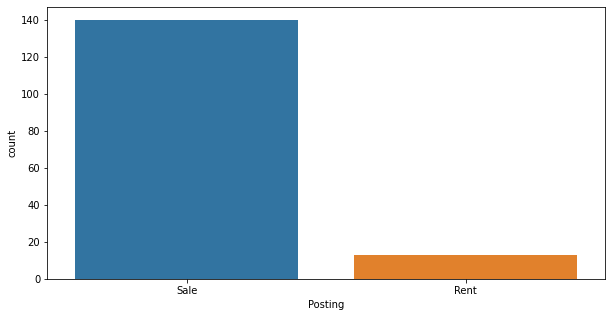

In [117]:
plt.figure(figsize = (10,5))
sns.countplot(x = "Posting",data = df_fin)

# Cleaning Estatemartbd

In [118]:
# dropping extra columns
df_fin.drop(["Ownership type","Price per sqft"],axis = 1 ,inplace = True)

In [119]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            153 non-null    object
 1   Location        153 non-null    object
 2   Bathrooms       110 non-null    object
 3   Bedrooms        108 non-null    object
 4   Size (in sqft)  151 non-null    object
 5   Description     148 non-null    object
 6   Posting         153 non-null    object
 7   Features        106 non-null    object
 8   property_type   153 non-null    object
 9   Total price     131 non-null    object
 10  AD URL          153 non-null    object
dtypes: object(11)
memory usage: 13.3+ KB


## Columns : bedrooms,bathrooms

In [120]:
df_fin["Bathrooms"].unique()  , df_fin["Bedrooms"].unique() 

(array([nan, ' 3 ', ' 2 ', ' 03 ', ' 4 ', ' 5 ', ' 6 ', ' 3 Bathrooms ',
        ' 02 '], dtype=object),
 array([nan, ' 3 ', ' 03 ', ' 2 ', ' 6 ', ' 4 ', ' 5 ', ' 3 Bedrooms ',
        ' 02 '], dtype=object))

In [121]:
df_fin["Bathrooms"].value_counts()  , df_fin["Bedrooms"].value_counts() 

( 3               67
  4               22
  2               14
  5                2
  6                2
  03               1
  3 Bathrooms      1
  02               1
 Name: Bathrooms, dtype: int64,
  3              73
  4              20
  2               8
  6               2
  5               2
  03              1
  3 Bedrooms      1
  02              1
 Name: Bedrooms, dtype: int64)

In [122]:
df_fin["Bathrooms"].replace({" 3 Bathrooms ":3," 02 ":2," 03 ":3}, inplace = True)
df_fin["Bedrooms"].replace({" 3 Bedrooms ":3," 02 ":2," 03 ":3},inplace = True)


In [123]:
df_fin["Bathrooms"].value_counts()  , df_fin["Bedrooms"].value_counts() 

( 3     67
  4     22
  2     14
 3       2
  5      2
  6      2
 2       1
 Name: Bathrooms, dtype: int64,
  3     73
  4     20
  2      8
 3       2
  6      2
  5      2
 2       1
 Name: Bedrooms, dtype: int64)

In [124]:
# filling null values to 0
df_fin["Bathrooms"].fillna(0,inplace = True)
df_fin["Bedrooms"].fillna(0,inplace = True)

In [125]:
# datatype object-> float
df_fin["Bathrooms"] = df_fin["Bathrooms"].astype("float")
df_fin["Bedrooms"] = df_fin["Bedrooms"].astype("float")

In [126]:
df_fin["Bedrooms"].isna().sum()

0

In [127]:
df_fin.rename(columns = {"Bathrooms":"num_bath_rooms","Bedrooms":"num_bed_rooms"},inplace = True)

In [128]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            153 non-null    object 
 1   Location        153 non-null    object 
 2   num_bath_rooms  153 non-null    float64
 3   num_bed_rooms   153 non-null    float64
 4   Size (in sqft)  151 non-null    object 
 5   Description     148 non-null    object 
 6   Posting         153 non-null    object 
 7   Features        106 non-null    object 
 8   property_type   153 non-null    object 
 9   Total price     131 non-null    object 
 10  AD URL          153 non-null    object 
dtypes: float64(2), object(9)
memory usage: 13.3+ KB


## Column : area

In [129]:
df_fin["Size (in sqft)"].unique()

array([' 3, 4, 5 kasha land SqFt', ' 1250 SqFt', ' 1518 SqFt',
       ' 950 SqFt', ' 1400 SqFt', ' 1000 SqFt', ' 1500 SqFt',
       ' 1300 SqFt', ' 3/5 kata SqFt', nan, ' 1350 SqFt', ' 1200 SqFt',
       ' 1270 SqFt', ' 1220 SqFt', ' 115 SqFt', ' 3240 SqFt',
       ' 1075 SqFt', ' 1237 SqFt', ' 1560 SqFt', ' 1125 SqFt',
       ' 1366 SqFt', ' 1480 SqFt', ' 1568 SqFt', ' 700 SqFt',
       ' 2000 SqFt', ' 100 SqFt', ' 2178 SqFt', ' 21600 SqFt',
       ' 1702 SqFt', ' 1,842 SqFt', ' 17280 SqFt', ' 1,310 SqFt',
       ' 2,218 SqFt', ' 1,409 SqFt', ' 1,638 SqFt', ' 1,666 SqFt',
       ' 2100 SqFt', ' 2080 SqFt', ' 2,360 SqFt', ' 1706 SqFt',
       ' 910 SqFt', ' 1,240 SqFt', ' 1645 SqFt', ' 1,506 SqFt',
       ' 1498 SqFt', ' 3,750 SqFt', ' 1575 SqFt', ' 900 SqFt',
       ' 3600 SqFt', ' 2880 SqFt', ' 1545 SFT SqFt', ' 720 SqFt',
       ' 1760 SqFt', ' 1,645 SqFt', ' 800 SqFt', ' 7200 SqFt',
       ' 1,480 SqFt', ' 2160 SqFt', ' 3,650 SqFt', ' 3900 SqFt',
       ' 4500 SqFt', ' 8,000 SqFt',

In [130]:
df_fin.rename(columns = {"Size (in sqft)":"area"},inplace = True)

In [131]:
# returning rows whose split value is not equal to 2
for index, i in df_fin.iterrows():
    units = ["kata","kasha"]
    size_ = df_fin.loc[index,"area"]
    splitted_size = size_.split()
    if len(splitted_size) !=  2:
        print(f"{index}")
        break
    """
    size_ = splitted_size[0]
    size_units = splitted_size[1]
    
    if size_units in units:
        area = size_ * 720
    
    df_fin.loc[index,"area"] = area
    """
    
df_fin["area"] = df_fin["area"].replace(" 3/5 kata SqFt","4 kata")
df_fin["area"] = df_fin["area"].replace(" 3, 4, 5 kasha land SqFt","5 kata")

0


In [132]:
# checking sample column
size_ = df_fin.loc[8,"area"]
splitted_size = size_.split()[0]
print(splitted_size)

4


In [133]:
df_fin.area.unique()

array(['5 kata', ' 1250 SqFt', ' 1518 SqFt', ' 950 SqFt', ' 1400 SqFt',
       ' 1000 SqFt', ' 1500 SqFt', ' 1300 SqFt', '4 kata', nan,
       ' 1350 SqFt', ' 1200 SqFt', ' 1270 SqFt', ' 1220 SqFt',
       ' 115 SqFt', ' 3240 SqFt', ' 1075 SqFt', ' 1237 SqFt',
       ' 1560 SqFt', ' 1125 SqFt', ' 1366 SqFt', ' 1480 SqFt',
       ' 1568 SqFt', ' 700 SqFt', ' 2000 SqFt', ' 100 SqFt', ' 2178 SqFt',
       ' 21600 SqFt', ' 1702 SqFt', ' 1,842 SqFt', ' 17280 SqFt',
       ' 1,310 SqFt', ' 2,218 SqFt', ' 1,409 SqFt', ' 1,638 SqFt',
       ' 1,666 SqFt', ' 2100 SqFt', ' 2080 SqFt', ' 2,360 SqFt',
       ' 1706 SqFt', ' 910 SqFt', ' 1,240 SqFt', ' 1645 SqFt',
       ' 1,506 SqFt', ' 1498 SqFt', ' 3,750 SqFt', ' 1575 SqFt',
       ' 900 SqFt', ' 3600 SqFt', ' 2880 SqFt', ' 1545 SFT SqFt',
       ' 720 SqFt', ' 1760 SqFt', ' 1,645 SqFt', ' 800 SqFt',
       ' 7200 SqFt', ' 1,480 SqFt', ' 2160 SqFt', ' 3,650 SqFt',
       ' 3900 SqFt', ' 4500 SqFt', ' 8,000 SqFt', ' 1,850 SqFt',
       ' 3,608 Sq

In [134]:
# removing unwanted spaces and commas in the numbers and converting kata to sqft 
df_fin["area"].fillna("0",inplace = True)
for index,i in df_fin.iterrows():
    units = ["kata"]
    splitted_area = df_fin.loc[index,"area"].strip().split()
    area = splitted_area[0]
    unit = splitted_area[-1]
    
    if unit in units:
        new_area = float(area.replace(",","")) * 720
        df_fin.loc[index,"area"] = new_area
    elif unit == "SqFt" :
        df_fin.loc[index,"area"] = area.replace(",","")
    else:
        df_fin.loc[index,"area"] = np.nan


In [135]:
#np.where(df_fin["area"] == "Mirpur")
df_fin["area"] = df_fin["area"].replace("Mirpur",np.nan)

In [136]:
df_fin["area"] = df_fin["area"].astype(float)

In [137]:
df_fin.area.unique()

array([ 3600.,  1250.,  1518.,   950.,  1400.,  1000.,  1500.,  1300.,
        2880.,    nan,  1350.,  1200.,  1270.,  1220.,   115.,  3240.,
        1075.,  1237.,  1560.,  1125.,  1366.,  1480.,  1568.,   700.,
        2000.,   100.,  2178., 21600.,  1702.,  1842., 17280.,  1310.,
        2218.,  1409.,  1638.,  1666.,  2100.,  2080.,  2360.,  1706.,
         910.,  1240.,  1645.,  1506.,  1498.,  3750.,  1575.,   900.,
        1545.,   720.,  1760.,   800.,  7200.,  2160.,  3650.,  3900.,
        4500.,  8000.,  1850.,  3608.,  1260.,  2130.,  1265.,  1325.,
        1150.,  1309.,  5400.,  1030.,  1640.,  1275.,  1581.,  7920.,
        1096.,  2200.,  2313., 12960.,  1800.,  1440.,  2165.,  4600.,
       29520.,  1697.,  1875.,  2455.,   560.,  2600.,  1050.,  1750.,
        2016.,  2198.,  1525.,  2135.,  2300.,  1503.,  2500.,  1365.,
        1450.,  1016.,  1380.,  1360.,   135.,  1900.])

In [138]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            153 non-null    object 
 1   Location        153 non-null    object 
 2   num_bath_rooms  153 non-null    float64
 3   num_bed_rooms   153 non-null    float64
 4   area            150 non-null    float64
 5   Description     148 non-null    object 
 6   Posting         153 non-null    object 
 7   Features        106 non-null    object 
 8   property_type   153 non-null    object 
 9   Total price     131 non-null    object 
 10  AD URL          153 non-null    object 
dtypes: float64(3), object(8)
memory usage: 13.3+ KB


In [139]:
# dropping rows which have null area values 
df_fin.dropna(subset = ["area"],inplace = True)


In [140]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 152
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            150 non-null    object 
 1   Location        150 non-null    object 
 2   num_bath_rooms  150 non-null    float64
 3   num_bed_rooms   150 non-null    float64
 4   area            150 non-null    float64
 5   Description     145 non-null    object 
 6   Posting         150 non-null    object 
 7   Features        104 non-null    object 
 8   property_type   150 non-null    object 
 9   Total price     129 non-null    object 
 10  AD URL          150 non-null    object 
dtypes: float64(3), object(8)
memory usage: 14.1+ KB


In [141]:
df_fin.rename(columns = {"Posting":"purpose"},inplace = True)

In [142]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 152
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            150 non-null    object 
 1   Location        150 non-null    object 
 2   num_bath_rooms  150 non-null    float64
 3   num_bed_rooms   150 non-null    float64
 4   area            150 non-null    float64
 5   Description     145 non-null    object 
 6   purpose         150 non-null    object 
 7   Features        104 non-null    object 
 8   property_type   150 non-null    object 
 9   Total price     129 non-null    object 
 10  AD URL          150 non-null    object 
dtypes: float64(3), object(8)
memory usage: 14.1+ KB


## Column : price

In [143]:
df_fin["Total price"].unique()

array(['4,200,000.00', '1,660,000.00', '16,698,000.00', '29,500,000.00',
       '8,700,000.00', '6,000,000.00', '60,000.00', '7,500,000.00', nan,
       '1,725,000.00', '6,500,000.00', '7,669,400.00', '9,180,000.00',
       '7,450,000.00', '8,400,000.00', '12,500,000.00', '11,600,000.00',
       '8,500,000.00', '8,970,000.00', '42,000.00', '11,914,000.00',
       '12,894,000.00', '276,000,000.00', '7,205,000.00', '4,375,000.00',
       '30,000,000.00', '11,976,500.00', '10,647,000.00', '6,480,000.00',
       '10,829,000.00', '9,776,000.00', '22,420,000.00', '8,871,200.00',
       '3,500,000.00', '5,580,000.00', '12,337,500.00', '10,240,800.00',
       '16,640,000.00', '28,000,000.00', '8,200,000.00', '3,900,000.00',
       '15,000,000.00', '8,800,000.00', '8,200.00', '1,100,000.00',
       '26,000.00', '5,200,000.00', '66,000,000.00', '11,692,000.00',
       '13,500,000.00', '47,000,000.00', '60,450,000.00', '8,000,000.00',
       '55,500,000.00', '6,250,000.00', '0.00', '3,600,000.00'

In [144]:
# removing the commas in the price values
df_fin.rename(columns = {"Total price":"price"},inplace = True)
df_fin.dropna(subset = ["price"],inplace = True)
for index,i in df_fin.iterrows():
    df_fin.loc[index,"price"] = df_fin.loc[index,"price"].replace(",","")

In [145]:
#df_fin["price"].fillna(0,inplace = True)

In [146]:
df_fin["price"].unique()

array(['4200000.00', '1660000.00', '16698000.00', '29500000.00',
       '8700000.00', '6000000.00', '60000.00', '7500000.00', '1725000.00',
       '6500000.00', '7669400.00', '9180000.00', '7450000.00',
       '8400000.00', '12500000.00', '11600000.00', '8500000.00',
       '8970000.00', '42000.00', '11914000.00', '12894000.00',
       '276000000.00', '7205000.00', '4375000.00', '30000000.00',
       '11976500.00', '10647000.00', '6480000.00', '10829000.00',
       '9776000.00', '22420000.00', '8871200.00', '3500000.00',
       '5580000.00', '12337500.00', '10240800.00', '16640000.00',
       '28000000.00', '8200000.00', '3900000.00', '15000000.00',
       '8800000.00', '8200.00', '1100000.00', '26000.00', '5200000.00',
       '66000000.00', '11692000.00', '13500000.00', '47000000.00',
       '60450000.00', '8000000.00', '55500000.00', '6250000.00', '0.00',
       '3600000.00', '9000000.00', '1250000.00', '4554000.00',
       '3700000.00', '16250000.00', '530000.00', '6465600.00',
    

In [147]:
df_fin["price"] = df_fin["price"].astype(float)

In [148]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 152
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            129 non-null    object 
 1   Location        129 non-null    object 
 2   num_bath_rooms  129 non-null    float64
 3   num_bed_rooms   129 non-null    float64
 4   area            129 non-null    float64
 5   Description     124 non-null    object 
 6   purpose         129 non-null    object 
 7   Features        93 non-null     object 
 8   property_type   129 non-null    object 
 9   price           129 non-null    float64
 10  AD URL          129 non-null    object 
dtypes: float64(4), object(7)
memory usage: 16.2+ KB


## Column : Address,Area,City

In [149]:
address = df_fin["Location"].apply(get_detailed_address).apply(pd.Series)
address

,City,Area,Address
0,Dhaka,,
1,,,Banasree Dhaka
2,Dhaka,,
3,Dhaka,,
4,Dhaka,,
...,...,...,...
148,,,Bashundhara R/A
149,Dhaka,,
150,Dhaka,Badda,
151,Dhaka,Uttara,


In [151]:
# concatinating the new address(city,area,address) with the existing dataframe df_fin
df_fin = pd.concat([df_fin,address],axis = 1)
df_fin.head(10)

,Name,Location,num_bath_rooms,num_bed_rooms,area,Description,purpose,Features,property_type,price,AD URL,City,Area,Address
0,The Valley Bangladesh ...,Dhaka,0.0,0.0,3600.0,The Valley is a small gated community land pro...,Sale,NaN,None,4200000.0,https://www.estatemartbd.com/property/234/en/t...,Dhaka,,
1,1250 Sqft Flat for Sale along with the Land Sh...,Banasree Dhaka,3.0,3.0,1250.0,জমি: ৬৭ কাঠা/ (৭৩ কাঠা)\nটাওয়ার: ৬টি\nফ্লাট: ৪...,Sale,NaN,Residential,1660000.0,https://www.estatemartbd.com/property/231/en/1...,,,Banasree Dhaka
2,"1518 sqft, 3 Beds large Apartment is ready for...",Dhaka,3.0,3.0,1518.0,When it comes to securing a permanent address ...,Sale,"Balcony ,Lift ,Grill ,Pool ,Parking",Residential,16698000.0,https://www.estatemartbd.com/property/233/en/1...,Dhaka,,
3,Sina Sweet Pea ...,Dhaka,2.0,3.0,950.0,NaN,Sale,"Cable TV ,Balcony ,Parking",None,29500000.0,https://www.estatemartbd.com/property/240/en/s...,Dhaka,,
4,"Ready Flat For Sale In Shyamoli, Shakhertek Ma...",Dhaka,3.0,3.0,1400.0,This apartment is spacious. The kitchen is bea...,Sale,"Air conditioning ,Cable TV ,Computer ,Dishwash...",Residential,8700000.0,https://www.estatemartbd.com/property/232/en/r...,Dhaka,,
5,A Fairly Large 1000 Sq Ft Apartment is Ready f...,Dhaka,3.0,3.0,1000.0,G.A Buddi Montro Pur is the perfect place if y...,Sale,"Air conditioning ,Cable TV ,Computer ,Dishwash...",Residential,6000000.0,https://www.estatemartbd.com/property/229/en/a...,Dhaka,,
6,Commercial Space To-Let ...,1208,2.0,0.0,1500.0,1500 Sft(approx) ready Space avialble for Offi...,Rent,NaN,None,60000.0,https://www.estatemartbd.com/property/239/en/c...,,,1208
7,A well-developed 1300 sq ft apartment is avail...,Dhaka,3.0,3.0,1300.0,The happy future of your dream home is now in ...,Sale,"Air conditioning ,Cable TV ,Computer ,Dishwash...",Residential,7500000.0,https://www.estatemartbd.com/property/230/en/a...,Dhaka,,
15,Buy 1st Floor Shop at Olympia Plaza ...,Savar,0.0,0.0,115.0,Booking Ongoing!FIRST FLOOR BEST LOCATION SHOP...,Sale,"Air conditioning ,Cable TV ,Computer ,Dishwash...",Commercial,1725000.0,https://www.estatemartbd.com/property/206/en/b...,,Savar,
17,Scion Priyota Apartment for Sale ...,Dhaka,2.0,3.0,1075.0,Assistant ManagerCell: 01611556613Scion Asset ...,Sale,"Air conditioning ,Cable TV ,Dishwasher ,Heatin...",Residential,6500000.0,https://www.estatemartbd.com/property/165/en/s...,Dhaka,,


In [187]:
df_fin.rename(columns = {"City":"city","Area":"locality","Address":"address"},inplace = True)

In [152]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 152
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            129 non-null    object 
 1   Location        129 non-null    object 
 2   num_bath_rooms  129 non-null    float64
 3   num_bed_rooms   129 non-null    float64
 4   area            129 non-null    float64
 5   Description     124 non-null    object 
 6   purpose         129 non-null    object 
 7   Features        93 non-null     object 
 8   property_type   129 non-null    object 
 9   price           129 non-null    float64
 10  AD URL          129 non-null    object 
 11  City            129 non-null    object 
 12  Area            129 non-null    object 
 13  Address         129 non-null    object 
dtypes: float64(4), object(10)
memory usage: 19.2+ KB


In [153]:
df_fin.shape

(129, 14)

In [154]:
df_fin.drop(columns = ["Location"],axis = 1, inplace = True)

In [155]:
df_fin.shape

(129, 13)

## Columns : Amenities

In [156]:
df_fin.rename(columns = {"Features":"amenities"},inplace = True)

In [157]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 152
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            129 non-null    object 
 1   num_bath_rooms  129 non-null    float64
 2   num_bed_rooms   129 non-null    float64
 3   area            129 non-null    float64
 4   Description     124 non-null    object 
 5   purpose         129 non-null    object 
 6   amenities       93 non-null     object 
 7   property_type   129 non-null    object 
 8   price           129 non-null    float64
 9   AD URL          129 non-null    object 
 10  City            129 non-null    object 
 11  Area            129 non-null    object 
 12  Address         129 non-null    object 
dtypes: float64(4), object(9)
memory usage: 18.2+ KB


In [158]:
df_fin["amenities"].fillna("null",inplace = True)

In [159]:
amenities = set()
for i in df_fin["amenities"]:
    if i is not np.nan:
        amenities.update(i.split(","))
amenities

{'Air conditioning ',
 'Balcony ',
 'Cable TV ',
 'Computer ',
 'Dishwasher ',
 'Grill ',
 'Heating ',
 'Internet ',
 'Lift ',
 'Microwave ',
 'Parking ',
 'Pool ',
 'null'}

In [160]:
for amenity in amenities:
    df_fin[f"{amenity.strip()}-amenity"] = df_fin["amenities"].str.contains(amenity).map({True:"Yes",False:'No'})

In [161]:
df_fin.head(10)

,Name,num_bath_rooms,num_bed_rooms,area,Description,purpose,amenities,property_type,price,AD URL,...,Balcony-amenity,Cable TV-amenity,Parking-amenity,Microwave-amenity,Air conditioning-amenity,Internet-amenity,Grill-amenity,Pool-amenity,Dishwasher-amenity,Lift-amenity
0,The Valley Bangladesh ...,0.0,0.0,3600.0,The Valley is a small gated community land pro...,Sale,null,None,4200000.0,https://www.estatemartbd.com/property/234/en/t...,...,No,No,No,No,No,No,No,No,No,No
1,1250 Sqft Flat for Sale along with the Land Sh...,3.0,3.0,1250.0,জমি: ৬৭ কাঠা/ (৭৩ কাঠা)\nটাওয়ার: ৬টি\nফ্লাট: ৪...,Sale,null,Residential,1660000.0,https://www.estatemartbd.com/property/231/en/1...,...,No,No,No,No,No,No,No,No,No,No
2,"1518 sqft, 3 Beds large Apartment is ready for...",3.0,3.0,1518.0,When it comes to securing a permanent address ...,Sale,"Balcony ,Lift ,Grill ,Pool ,Parking",Residential,16698000.0,https://www.estatemartbd.com/property/233/en/1...,...,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes
3,Sina Sweet Pea ...,2.0,3.0,950.0,NaN,Sale,"Cable TV ,Balcony ,Parking",None,29500000.0,https://www.estatemartbd.com/property/240/en/s...,...,Yes,Yes,Yes,No,No,No,No,No,No,No
4,"Ready Flat For Sale In Shyamoli, Shakhertek Ma...",3.0,3.0,1400.0,This apartment is spacious. The kitchen is bea...,Sale,"Air conditioning ,Cable TV ,Computer ,Dishwash...",Residential,8700000.0,https://www.estatemartbd.com/property/232/en/r...,...,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes
5,A Fairly Large 1000 Sq Ft Apartment is Ready f...,3.0,3.0,1000.0,G.A Buddi Montro Pur is the perfect place if y...,Sale,"Air conditioning ,Cable TV ,Computer ,Dishwash...",Residential,6000000.0,https://www.estatemartbd.com/property/229/en/a...,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
6,Commercial Space To-Let ...,2.0,0.0,1500.0,1500 Sft(approx) ready Space avialble for Offi...,Rent,null,None,60000.0,https://www.estatemartbd.com/property/239/en/c...,...,No,No,No,No,No,No,No,No,No,No
7,A well-developed 1300 sq ft apartment is avail...,3.0,3.0,1300.0,The happy future of your dream home is now in ...,Sale,"Air conditioning ,Cable TV ,Computer ,Dishwash...",Residential,7500000.0,https://www.estatemartbd.com/property/230/en/a...,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
15,Buy 1st Floor Shop at Olympia Plaza ...,0.0,0.0,115.0,Booking Ongoing!FIRST FLOOR BEST LOCATION SHOP...,Sale,"Air conditioning ,Cable TV ,Computer ,Dishwash...",Commercial,1725000.0,https://www.estatemartbd.com/property/206/en/b...,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
17,Scion Priyota Apartment for Sale ...,2.0,3.0,1075.0,Assistant ManagerCell: 01611556613Scion Asset ...,Sale,"Air conditioning ,Cable TV ,Dishwasher ,Heatin...",Residential,6500000.0,https://www.estatemartbd.com/property/165/en/s...,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes


In [162]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 152
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      129 non-null    object 
 1   num_bath_rooms            129 non-null    float64
 2   num_bed_rooms             129 non-null    float64
 3   area                      129 non-null    float64
 4   Description               124 non-null    object 
 5   purpose                   129 non-null    object 
 6   amenities                 129 non-null    object 
 7   property_type             129 non-null    object 
 8   price                     129 non-null    float64
 9   AD URL                    129 non-null    object 
 10  City                      129 non-null    object 
 11  Area                      129 non-null    object 
 12  Address                   129 non-null    object 
 13  Computer-amenity          129 non-null    object 
 14  Heating-am

In [163]:
df_fin.drop(["amenities"],axis = 1,inplace = True)

In [164]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 152
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      129 non-null    object 
 1   num_bath_rooms            129 non-null    float64
 2   num_bed_rooms             129 non-null    float64
 3   area                      129 non-null    float64
 4   Description               124 non-null    object 
 5   purpose                   129 non-null    object 
 6   property_type             129 non-null    object 
 7   price                     129 non-null    float64
 8   AD URL                    129 non-null    object 
 9   City                      129 non-null    object 
 10  Area                      129 non-null    object 
 11  Address                   129 non-null    object 
 12  Computer-amenity          129 non-null    object 
 13  Heating-amenity           129 non-null    object 
 14  null-ameni

## Column : building_type , building_nature

In [165]:
df_fin["property_type"]

0             None
1      Residential
2      Residential
3             None
4      Residential
          ...     
148    Residential
149    Residential
150    Residential
151    Residential
152    Residential
Name: property_type, Length: 129, dtype: object

In [166]:
translator = Translator()

In [167]:
df_fin.rename(columns = {"property_type":"building_type"},inplace = True)

In [168]:
df_fin["building_nature"] = None


In [169]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 152
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      129 non-null    object 
 1   num_bath_rooms            129 non-null    float64
 2   num_bed_rooms             129 non-null    float64
 3   area                      129 non-null    float64
 4   Description               124 non-null    object 
 5   purpose                   129 non-null    object 
 6   building_type             129 non-null    object 
 7   price                     129 non-null    float64
 8   AD URL                    129 non-null    object 
 9   City                      129 non-null    object 
 10  Area                      129 non-null    object 
 11  Address                   129 non-null    object 
 12  Computer-amenity          129 non-null    object 
 13  Heating-amenity           129 non-null    object 
 14  null-ameni

In [170]:
# using the Translator class to translate bangla to english
# which is applied on the "property_description" and "property_name" column
# in order to find out nature of building 

# keywords for residential and commercial
residential = "residency.|Residential.| Residential |residential|gated|community|House|house|Apartment|apartment|Flat|flat |Duplex |Home |home |Independent House"
commercial = "Commercial |commercial| Office/Showroom/Warehouse|Office space|office space|Showroom|showroom|Shop|shop |restaurant |Restaurant"

for index,i in df_fin.iterrows():
    #if df_fin.loc[index,"property_type"] == "None":
        
        # here the description and name columns are translated from bangla to english
        translated_desc = translator.translate(df_fin.loc[index,"Description"])
        translated_name = translator.translate(df_fin.loc[index,"Name"])
       
        # regex used to check if the given word is found in keywords
        search_key_word_res_desc = re.search(residential,translated_desc.text)
        search_key_word_com_desc = re.search(commercial,translated_desc.text)
        
        
        if bool(search_key_word_res_desc):
            # if keyword lies in "residential" then property_type is assigned as Residential
            df_fin.loc[index,"building_nature"] = "Residential"
        elif bool(search_key_word_com_desc):
            # if keyword lies in "commercial" then property_type is assigned as Commercial
            df_fin.loc[index,"building_nature"] = "Commercial"
       
        
        else:
            # if description doesn't exist or doens't have keywords
            # regex is used on  property name column 
            search_key_word_res_name = re.search(residential,translated_name.text)
            search_key_word_com_name = re.search(commercial,translated_name.text)
            
            if bool(search_key_word_res_name):
                # if keyword lies in "residential" then property_type is assigned as Residential
                df_fin.loc[index,"building_nature"] = "Residential"
            elif bool(search_key_word_com_name):
                # if keyword lies in "commercial" then property_type is assigned as Commercial
                df_fin.loc[index,"building_nature"] = "Commercial" 
            else:
                df_fin.loc[index,"building_nature"] = "None"
            
        

In [265]:
#df_fin.loc[1,"property_type"]

In [171]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 152
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      129 non-null    object 
 1   num_bath_rooms            129 non-null    float64
 2   num_bed_rooms             129 non-null    float64
 3   area                      129 non-null    float64
 4   Description               124 non-null    object 
 5   purpose                   129 non-null    object 
 6   building_type             129 non-null    object 
 7   price                     129 non-null    float64
 8   AD URL                    129 non-null    object 
 9   City                      129 non-null    object 
 10  Area                      129 non-null    object 
 11  Address                   129 non-null    object 
 12  Computer-amenity          129 non-null    object 
 13  Heating-amenity           129 non-null    object 
 14  null-ameni

In [172]:
df_fin["building_type"].unique() , df_fin["building_nature"].unique()

(array(['None', 'Residential', 'Commercial'], dtype=object),
 array(['Residential', 'None', 'Commercial'], dtype=object))

In [173]:
#df_fin["property_type"] = None

In [174]:
df_fin["building_nature"].value_counts()

Residential    112
None            13
Commercial       4
Name: building_nature, dtype: int64

In [175]:
df_fin.building_type.value_counts()

Residential    80
None           46
Commercial      3
Name: building_type, dtype: int64

In [176]:
df_fin.loc[3,"building_nature"] = "Residential"

In [177]:
# the indexes of the columns are searched whose property_type is None or cannot be differentiated as 
# "Residential" or "Commercial"
for number in df_fin[df_fin["building_nature"] == "None"].index:
            
    print(f'{number} "Description": {translator.translate(df_fin.loc[number,"Description"]).text}')
    print(f'{number} "Name":{translator.translate(df_fin.loc[number,"Name"]).text}')
 


28 "Description": Please Contact the number below for further information: Mo So Hossain018339341110176446828601586364425 Land 45 decimals with the two Cattel shade, caretaker living room toilet and bath with kitchen, Fish with pond, all around boundary and front side wall boundary. Whole property beside of carpeting road, garden full of fruits tree and vegetables plants.For more information do not hesitate to call me.
28 "Name":30 Khata Plot Selling with All Existing Properties
49 "Description": Please Contact the number below for further information.City Island Properties 01672322168 A plot of 2.08 plots will be sold Aftab Nagar Project Block E Sector 1 Road 5 Rampura Badda Dhaka Registry has been modded 7 talar pelan will be passed
49 "Name":2.08 cut plot will be sold Aftab Nagar Project Dhaka
54 "Description": Please Contact the number below for further information.Macro Properties Limited01780228888 Bashundhara, P block 5 katha Ready plot will be sale:????Block - P ( Adjacent to 3

In [178]:
df_fin["building_nature"] = df_fin["building_nature"].replace("None",np.nan)
df_fin.dropna(subset = ["building_nature"],inplace = True)

<AxesSubplot:xlabel='building_nature', ylabel='count'>

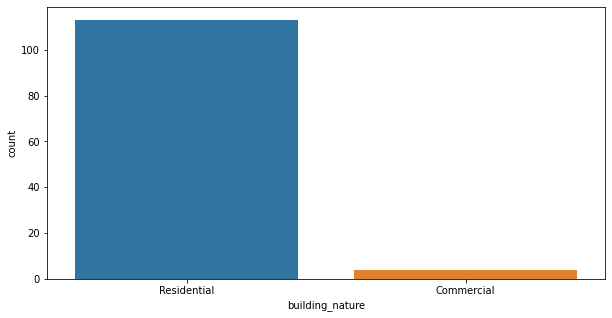

In [179]:
plt.figure(figsize = (10,5))
sns.countplot(x = "building_nature",data = df_fin)

In [180]:
df_fin.drop(columns = ["Name"],axis = 1,inplace = True)

In [181]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 152
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num_bath_rooms            117 non-null    float64
 1   num_bed_rooms             117 non-null    float64
 2   area                      117 non-null    float64
 3   Description               112 non-null    object 
 4   purpose                   117 non-null    object 
 5   building_type             117 non-null    object 
 6   price                     117 non-null    float64
 7   AD URL                    117 non-null    object 
 8   City                      117 non-null    object 
 9   Area                      117 non-null    object 
 10  Address                   117 non-null    object 
 11  Computer-amenity          117 non-null    object 
 12  Heating-amenity           117 non-null    object 
 13  null-amenity              117 non-null    object 
 14  Balcony-am

In [182]:
df_fin.rename(columns = {"Description":"property_description"},inplace = True)

In [183]:
df_fin.drop(columns = ["building_type"],axis = 1,inplace = True)

In [188]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 152
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num_bath_rooms            117 non-null    float64
 1   num_bed_rooms             117 non-null    float64
 2   area                      117 non-null    float64
 3   property_description      112 non-null    object 
 4   purpose                   117 non-null    object 
 5   price                     117 non-null    float64
 6   property_url              117 non-null    object 
 7   city                      117 non-null    object 
 8   locality                  117 non-null    object 
 9   address                   117 non-null    object 
 10  Computer-amenity          117 non-null    object 
 11  Heating-amenity           117 non-null    object 
 12  null-amenity              117 non-null    object 
 13  Balcony-amenity           117 non-null    object 
 14  Cable TV-a

In [185]:
df_fin.rename(columns = {"AD URL":"property_url"},inplace = True)

In [189]:
df_fin.to_csv("cleaned_estatemartbd.csv",index = False)
